<a href="https://colab.research.google.com/github/sneharc16/Customer-Segmentation-using-Machine-Learning-in-R/blob/main/Customer_Segmentation_using_Machine_Learning_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation using Machine Learning in R
One of the most useful applications of Unsupervised Learning is Customer Segmentation.
By using clustering techniques, companies can identify different segments of customers allowing them to target the potential user base.
For this project, I intend to use K-means clustering to cluster the unlabeled dataset.


You can download the dataset for Customer Segmentation through this link: https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view

#Importing Necessary Libraries and Packages



**Step 1:** Initially, we will perform data exploration and import the necessary packages required for the project and then read the data. Then, we will go through the input data to gain some necessary insights about it.

In [1]:
install.packages("plotrix")
library(plotrix)
library(purrr)
library(cluster)
library(grid)
install.packages("gridExtra", dependencies=TRUE)
install.packages("factoextra")
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘egg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [4]:
customer_data <- read.csv("/content/Mall_Customers.csv")
print(customer_data)

    CustomerID Gender Age Annual.Income..k.. Spending.Score..1.100.
1            1   Male  19                 15                     39
2            2   Male  21                 15                     81
3            3 Female  20                 16                      6
4            4 Female  23                 16                     77
5            5 Female  31                 17                     40
6            6 Female  22                 17                     76
7            7 Female  35                 18                      6
8            8 Female  23                 18                     94
9            9   Male  64                 19                      3
10          10 Female  30                 19                     72
11          11   Male  67                 19                     14
12          12 Female  35                 19                     99
13          13 Female  58                 20                     15
14          14 Female  24                 20    

In [5]:
str(customer_data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [6]:
names(customer_data)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

**Step 2:** Now, we will display the first six rows of our dataset using the head() function and use the summary() function to output summary of the same.

In [7]:
head(customer_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [8]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [9]:
sd(customer_data$Age)

[1] 13.96901

In [10]:
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

In [11]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [12]:
sd(customer_data$Spending.Score..1.100.)

[1] 25.82352

#Customer Gender Visualization
**Step 3:** We will create a barplot and a piechart to show the gender distribution across our customer_data dataset

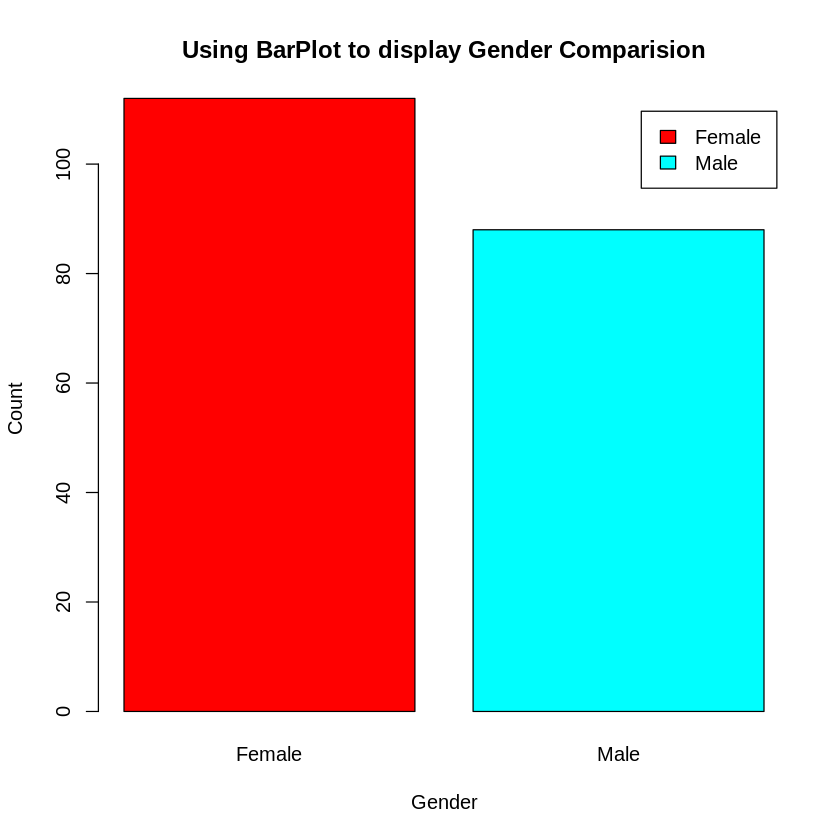

In [13]:
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

From the above barplot, it is observed that the number of females is significantly higher than the males.

 **Step 4**: Now, we will visualize a pie chart to observe the ratio of the gender distribution.

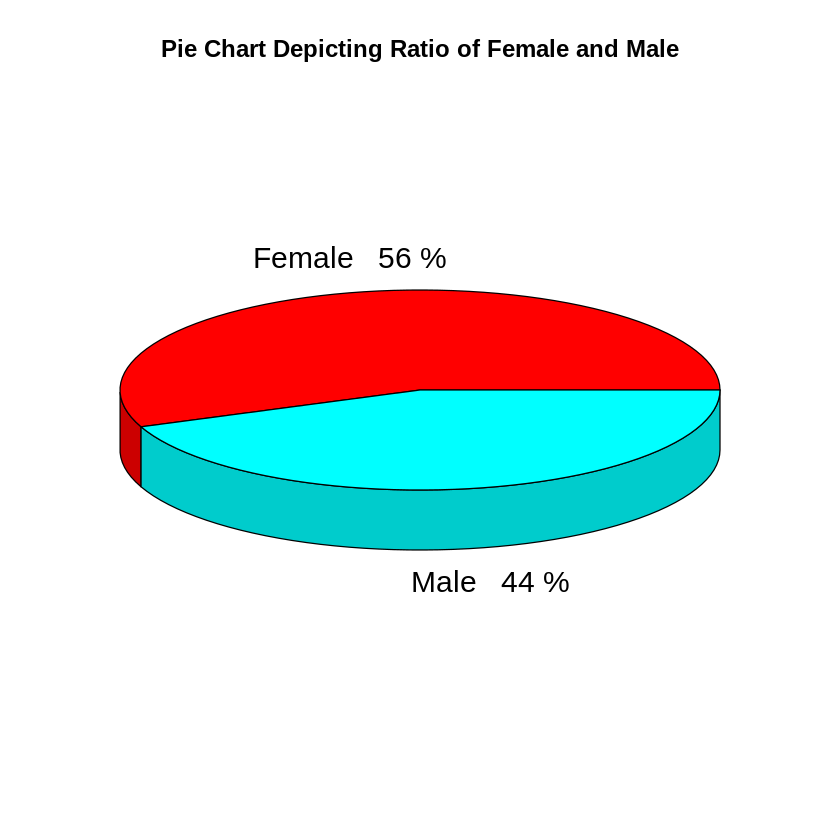

In [14]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male")

From this graph, we observe that the percentage of female is 56% from the given customer dataset, whereas the percentage of male in the customer dataset is 44%

#Visualization of Age Distribution
**Step 5**: Now we will plot a histogram to view the distribution to plot the frequency of customer ages. We will first proceed by taking summary of the Age variable

In [15]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

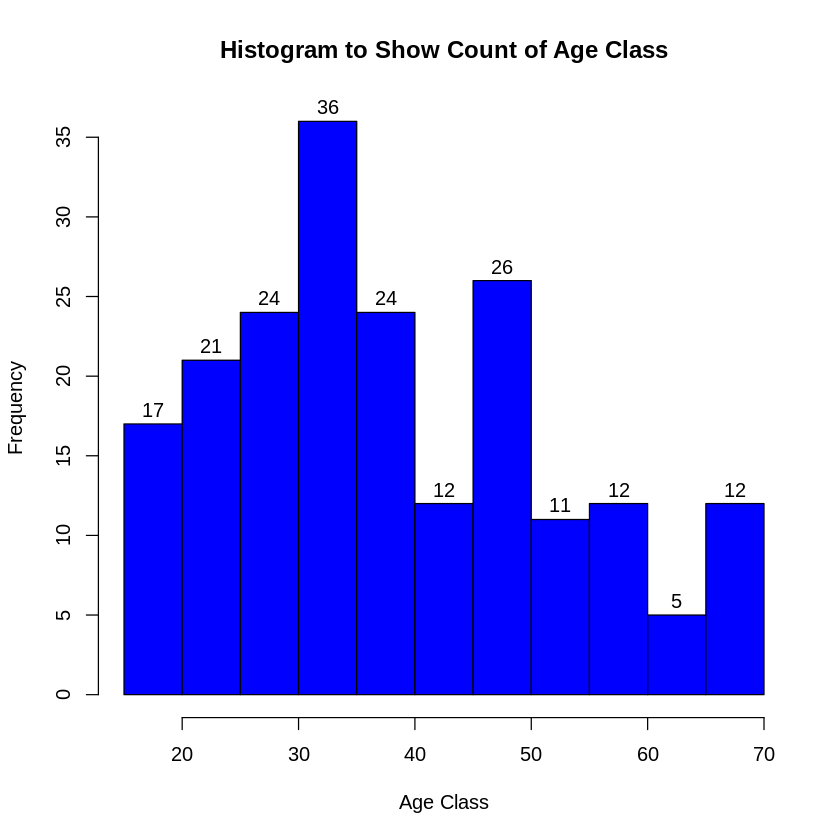

In [16]:
hist(customer_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

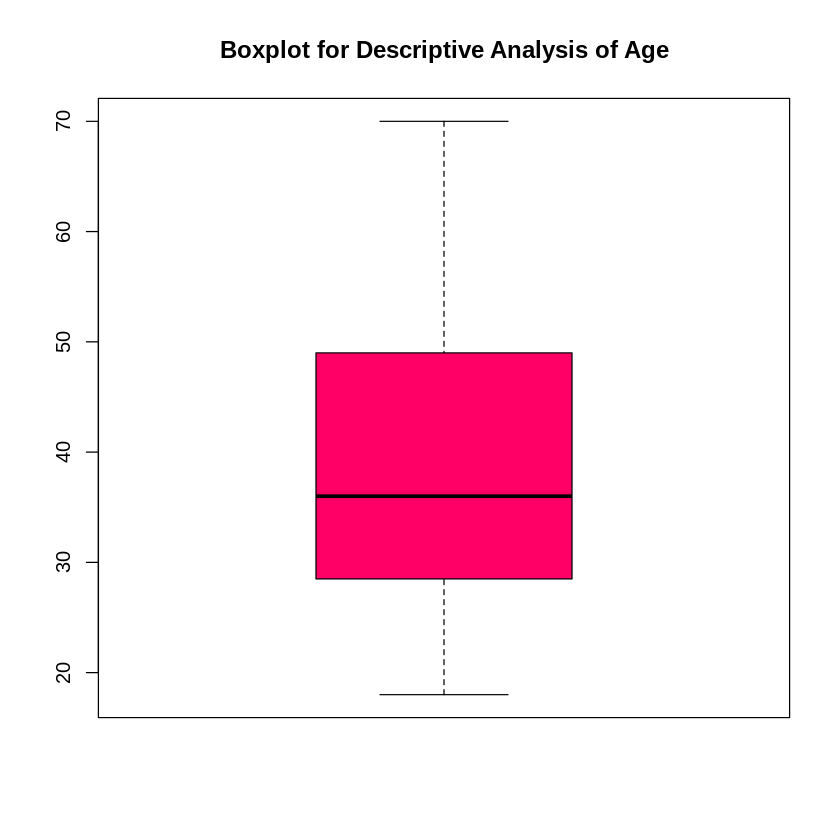

In [17]:
boxplot(customer_data$Age,
       col="#ff0066", # Add a '#' before the hexadecimal color code
       main="Boxplot for Descriptive Analysis of Age")

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

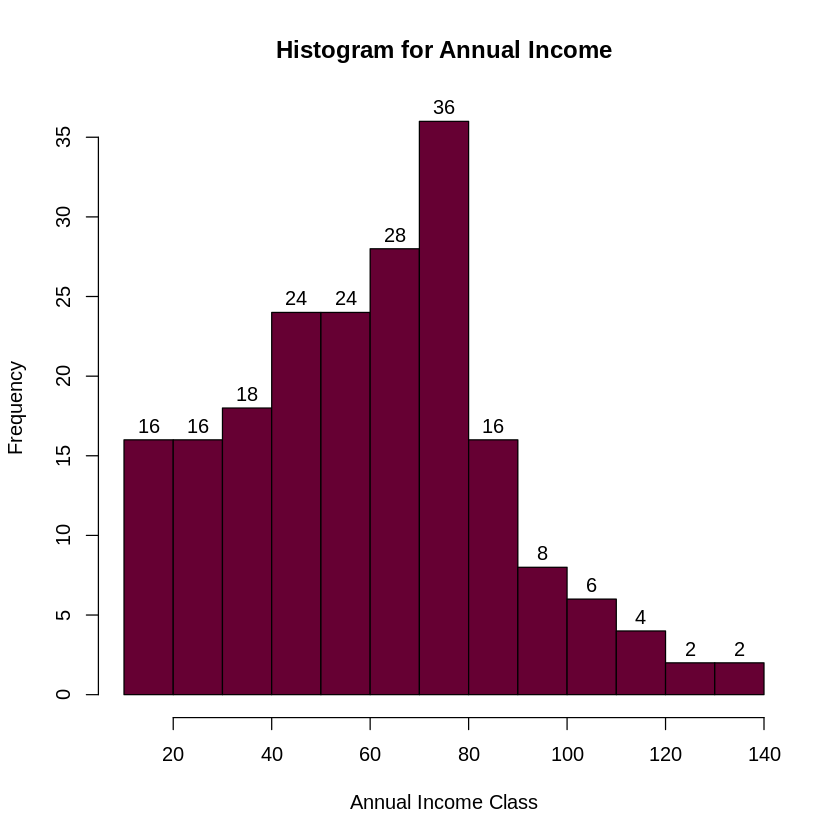

In [18]:
summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

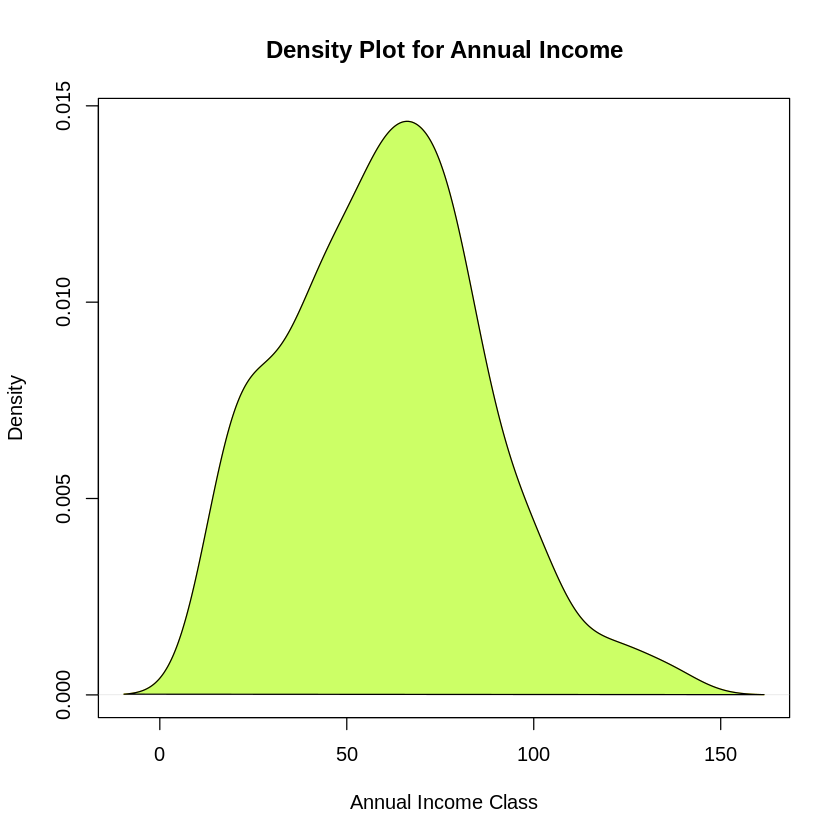

In [19]:
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

#Analyzing Spending Score of the Customers

In [20]:
summary(customer_data$Spending.Score..1.100.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

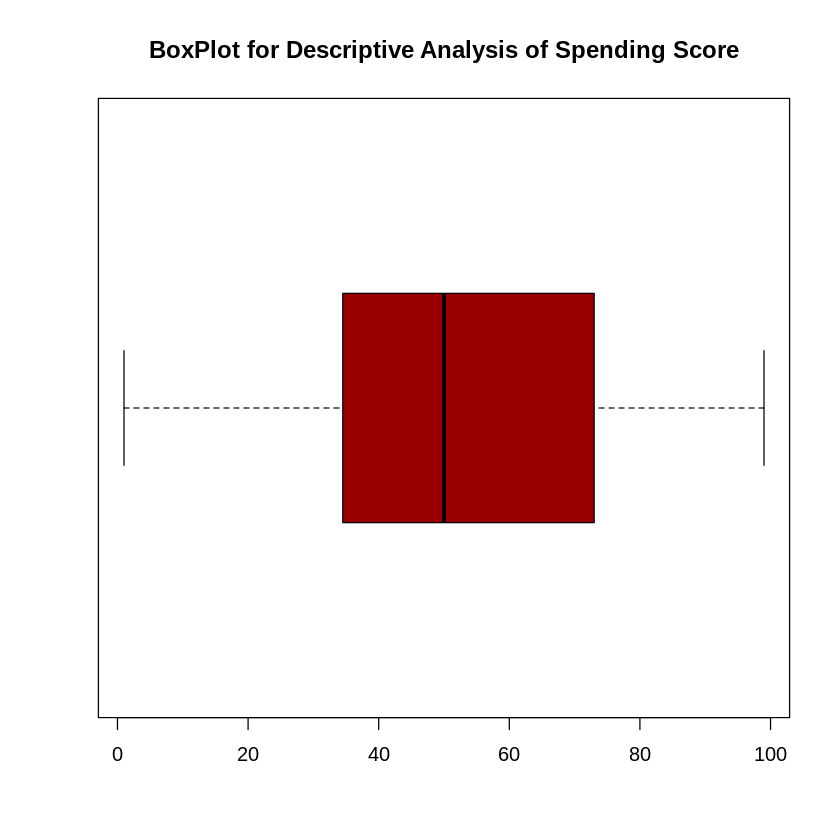

In [21]:
boxplot(customer_data$Spending.Score..1.100.,
   horizontal=TRUE,
   col="#990000",
   main="BoxPlot for Descriptive Analysis of Spending Score")

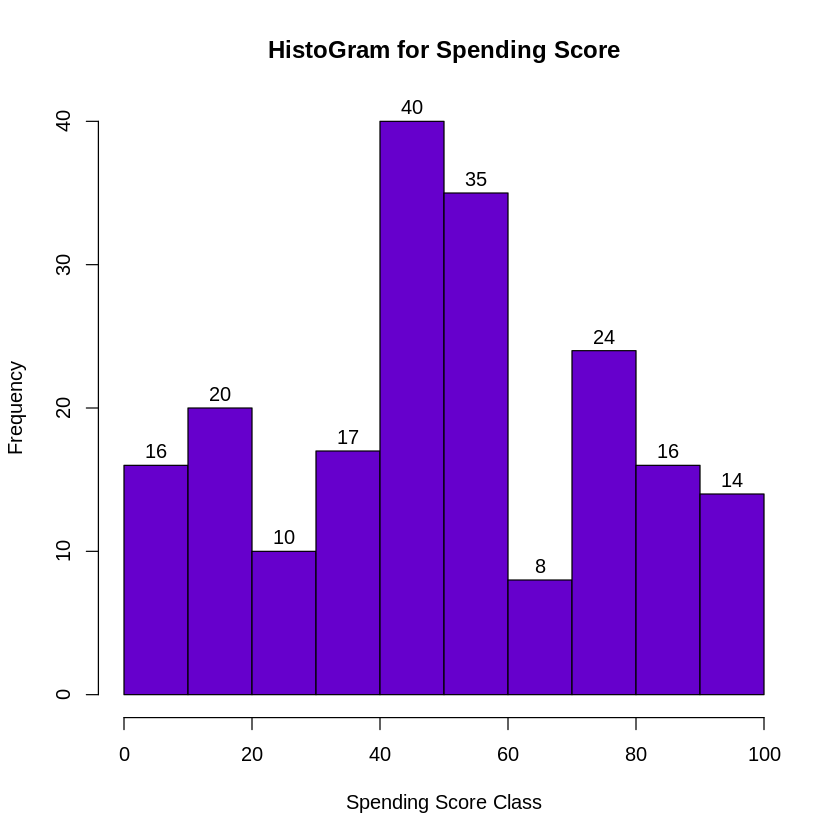

In [22]:
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the histogram, we conclude that customers between class 40 and 50 have the highest spending score among all the classes.

#K-means Algorithm
The K-means algorithm begins by selecting k random centroids from the dataset. Each data point is assigned to the nearest centroid based on Euclidean distance. The centroids are recalculated iteratively as the mean of the assigned points, and data points are reassigned if necessary. This process continues until the cluster assignments no longer change or a maximum iteration limit is reached.

**Determining Optimal Clusters**
We will use the following methods to utilize the optimal number of clusters. To help in determining the optimal clusters, there are three popular methods –

* Elbow method
* Silhouette method
* Gap statistic

#Elbow Method

The main goal behind cluster partitioning methods like k-means is to define the clusters such that the intra-cluster variation stays minimum.

**minimize(sum W(Ck)), k=1…k**

Where Ck represents the kth cluster and W(Ck) denotes the intra-cluster variation. With the measurement of the total intra-cluster variation, one can evaluate the compactness of the clustering boundary.

First, we will calculate the clustering algorithm for several values of k. This can be done by creating a variation within k from 1 to 10 clusters. We then calculate the total intra-cluster sum of square (iss). Then, we proceed to plot iss based on the number of k clusters. This plot denotes the appropriate number of clusters required in our model. In the plot, the location of a bend or a knee is the indication of the optimum number of clusters. Let us implement this in R as follows –

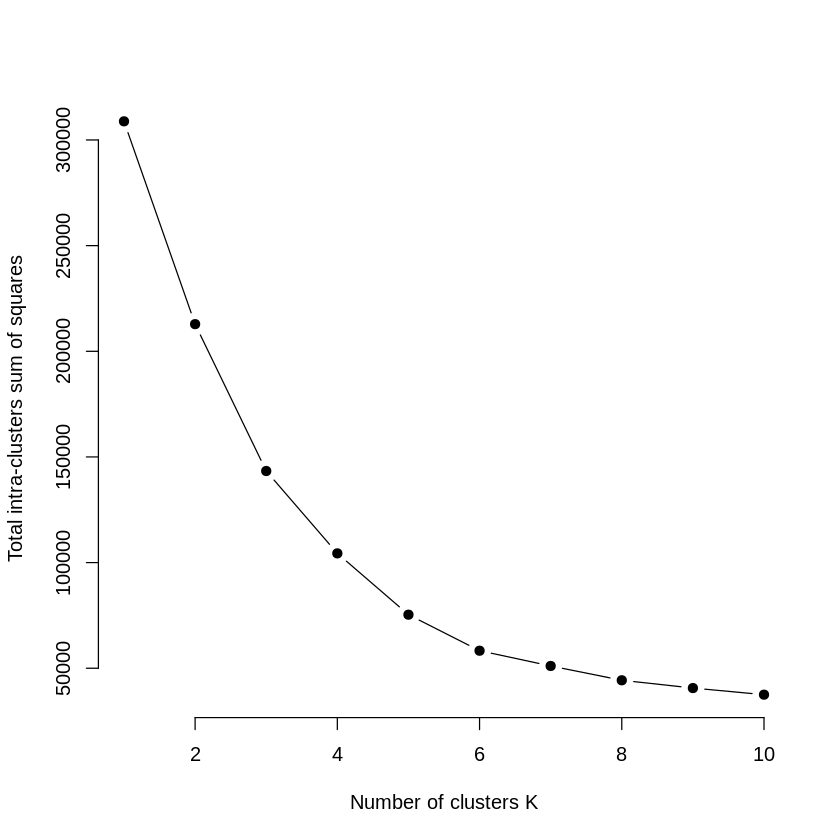

In [24]:
set.seed(123)

iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10

iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE,
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

From the above graph, we conclude that 4 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

#Average Silhouette Method
With the help of the average silhouette method, we can measure the quality of our clustering operation. With this, we can determine how well within the cluster is the data object. If we obtain a high average silhouette width, it means that we have good clustering. The average silhouette method calculates the mean of silhouette observations for different k values. With the optimal number of k clusters, one can maximize the average silhouette over significant values for k clusters.

Using the silhouette function in the cluster package, we can compute the average silhouette width using the kmean function. Here, the optimal cluster will possess highest average.

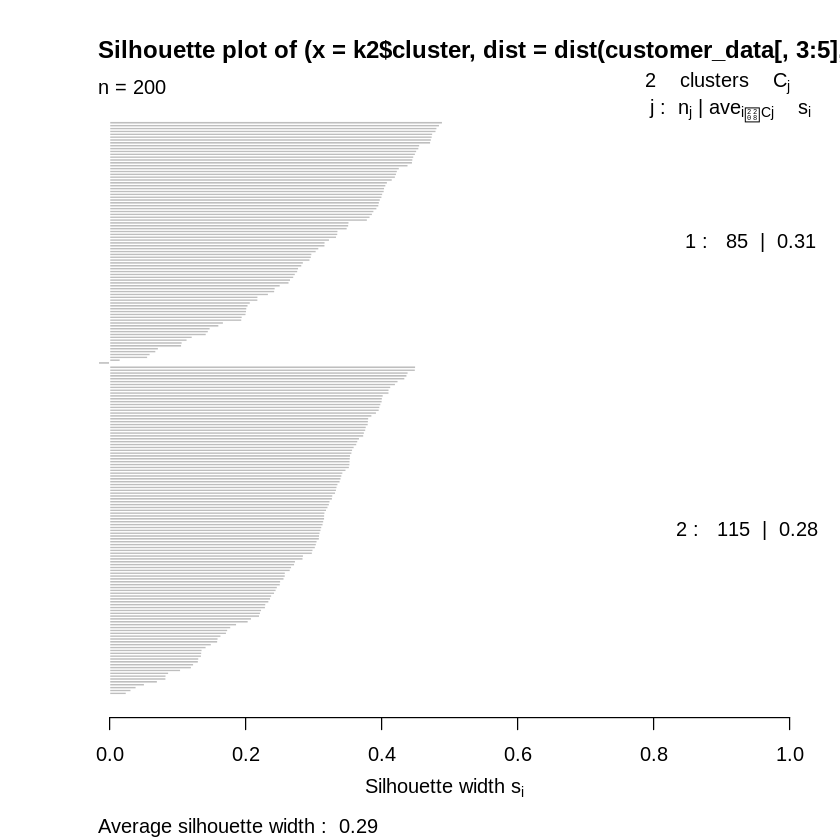

In [25]:
k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

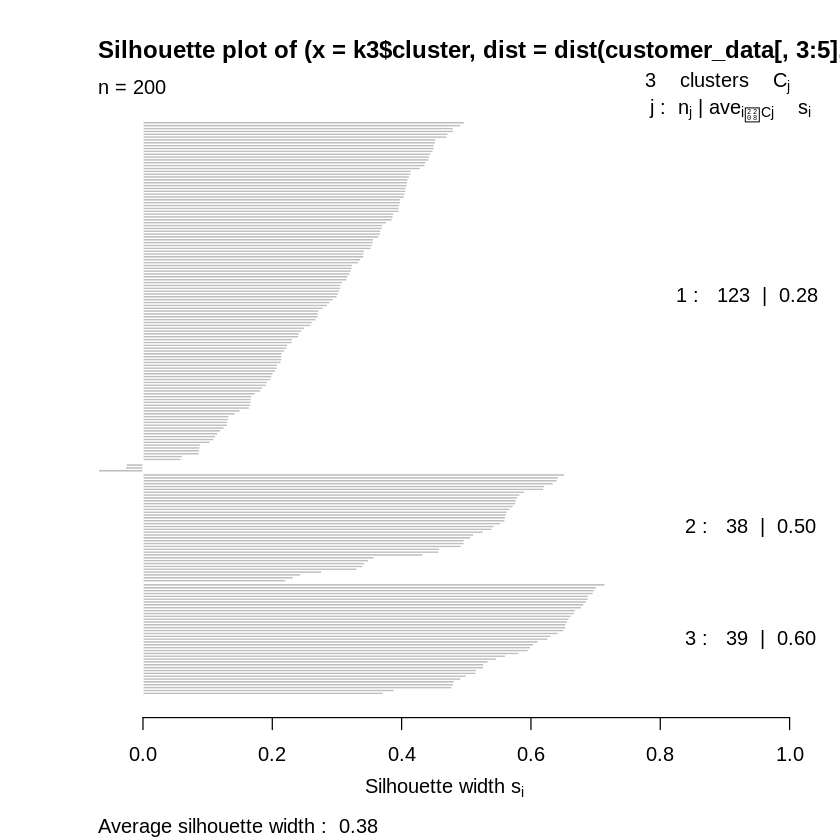

In [26]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

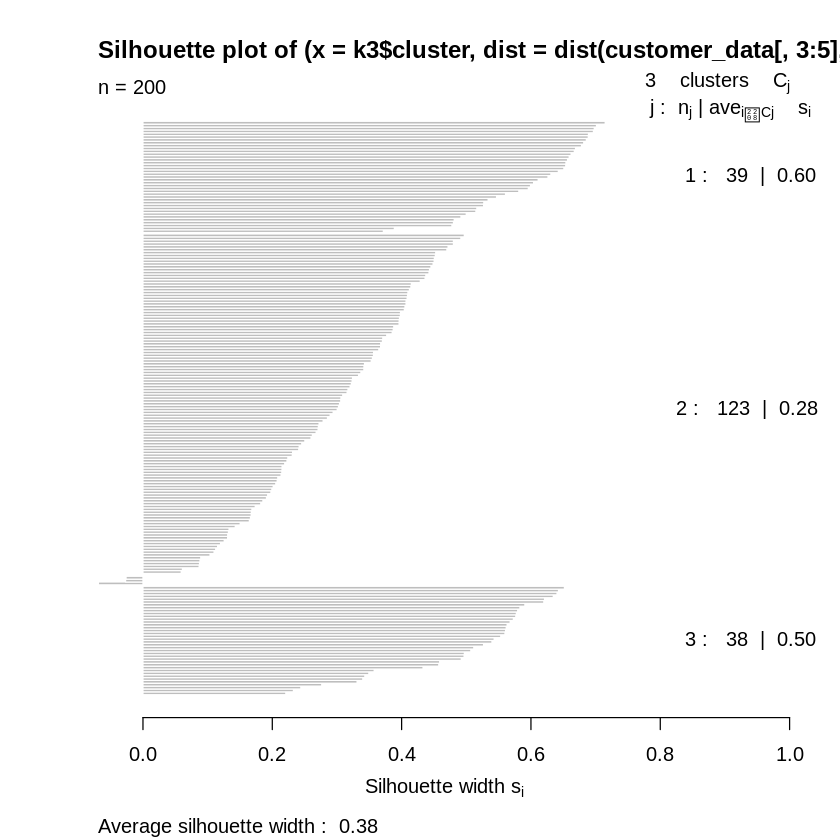

In [27]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

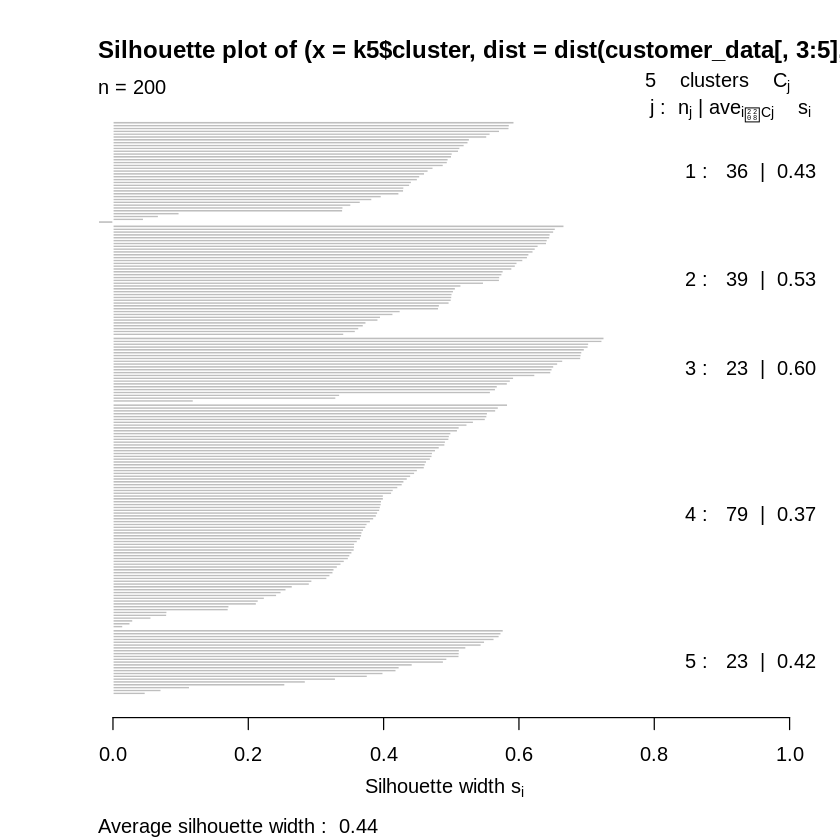

In [28]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

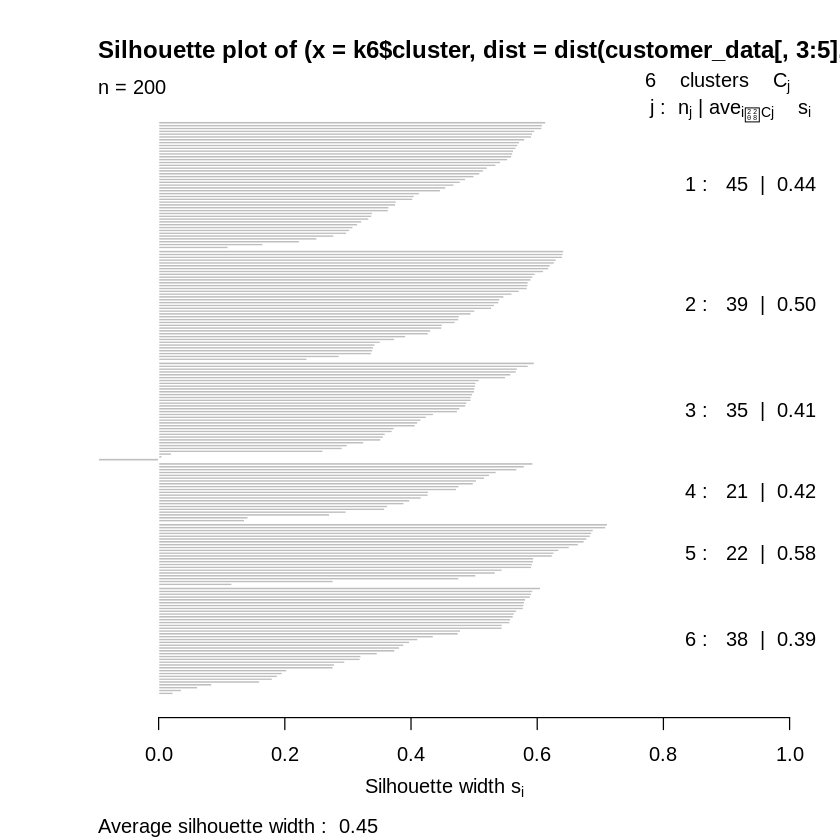

In [29]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

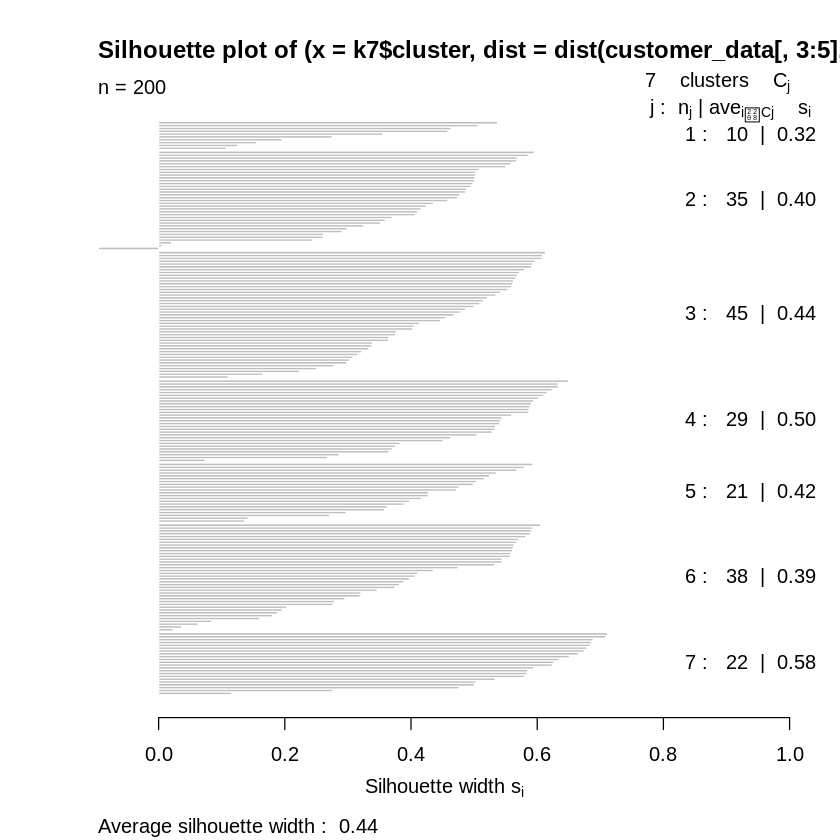

In [30]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

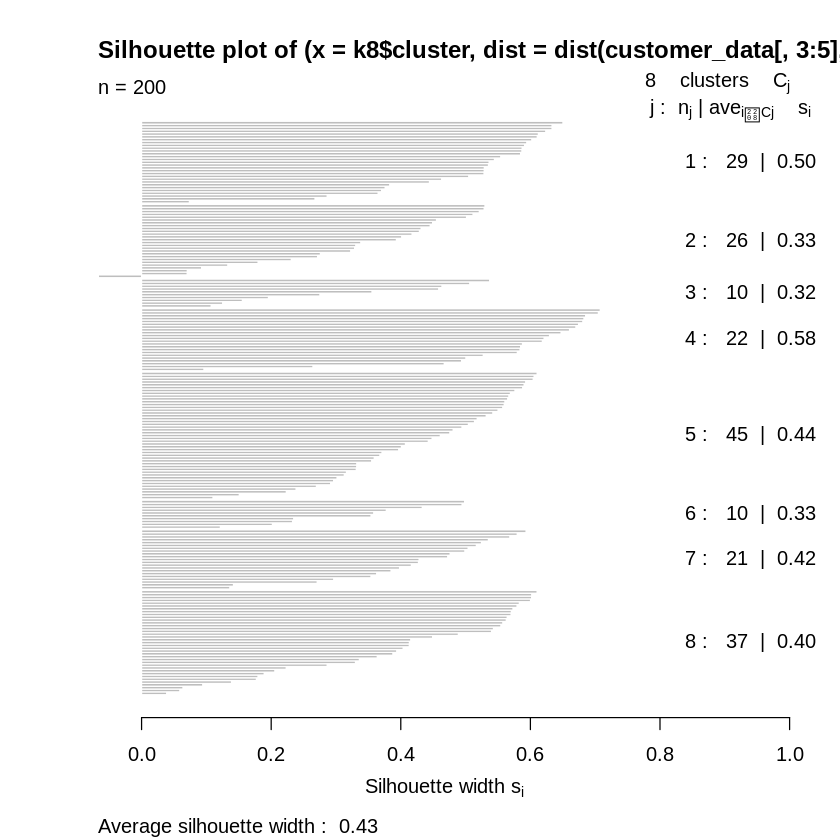

In [31]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

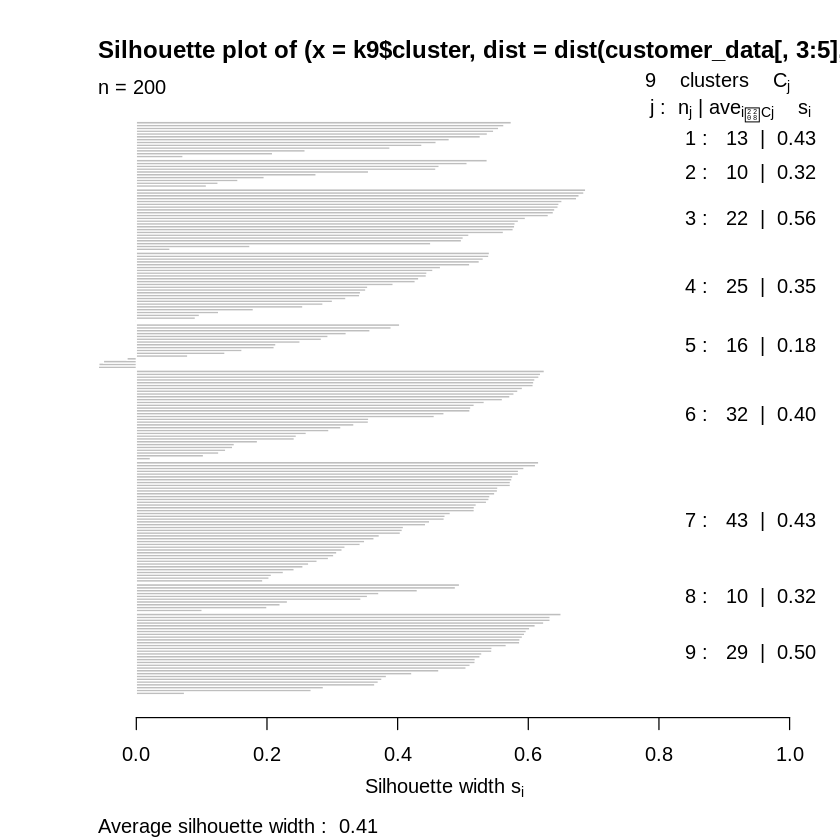

In [32]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

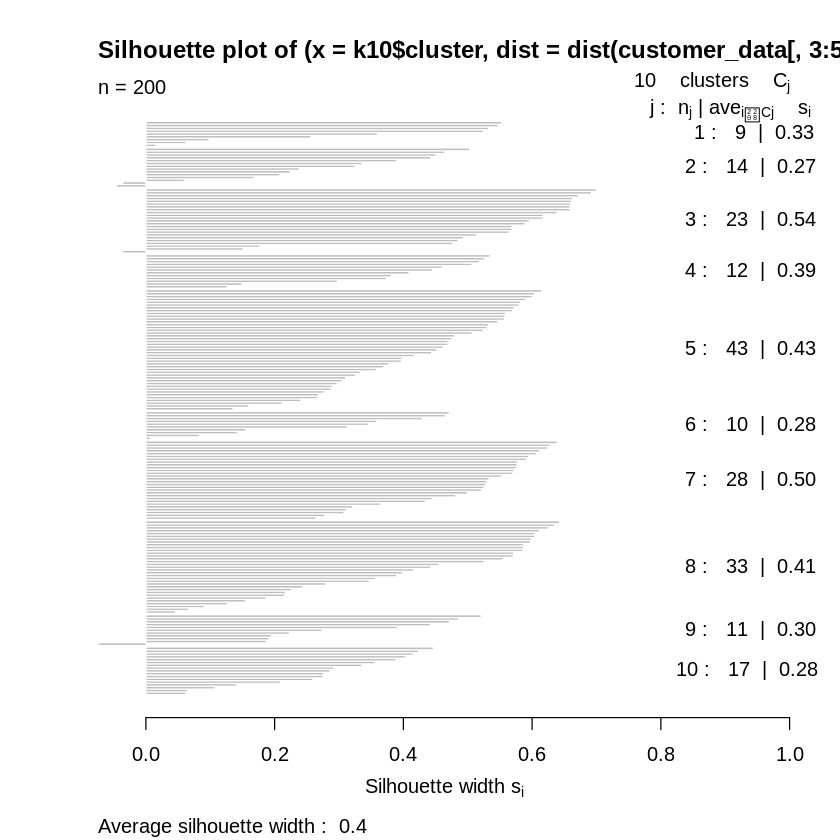

In [33]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

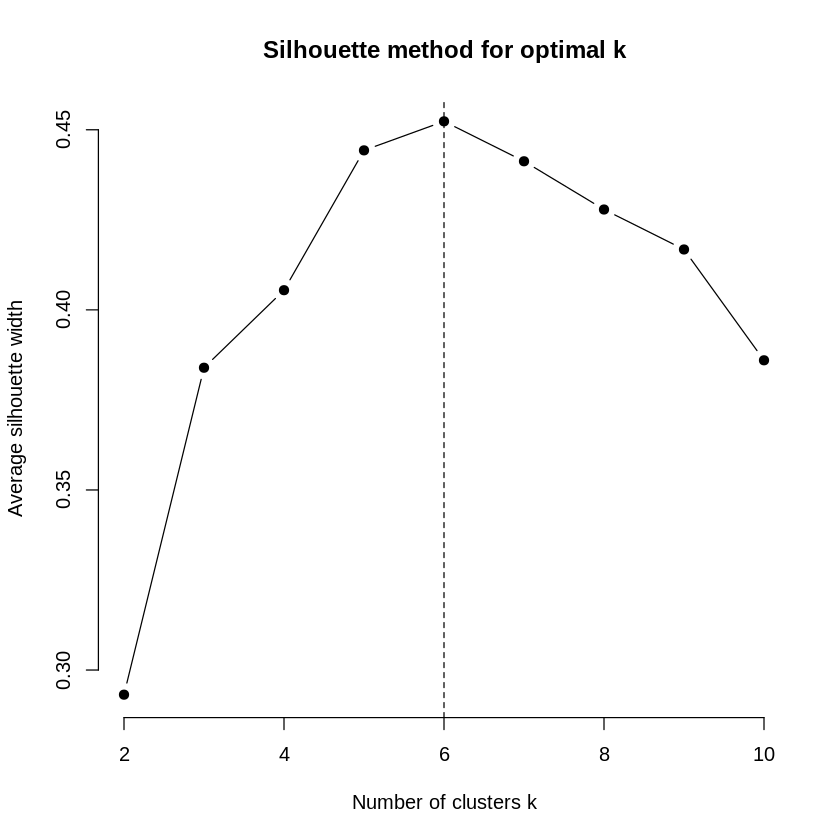

In [34]:
max_clusters <- 10
sil_width <- numeric(max_clusters)

for (i in 2:max_clusters) {
  kmeans_result <- kmeans(customer_data[, 3:5], centers = i, nstart = 25)
  ss <- silhouette(kmeans_result$cluster, dist(customer_data[, 3:5]))
  sil_width[i] <- mean(ss[, 3])
}

optimal_clusters <- which.max(sil_width)

plot(2:max_clusters, sil_width[2:max_clusters],
     type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters k",
     ylab = "Average silhouette width")

abline(v = optimal_clusters, lty = 2)
title(main = "Silhouette method for optimal k")

#Gap Statistic Method
For computing the gap statistics method we can utilize the clusGap function for providing gap statistic as well as standard error for a given output.

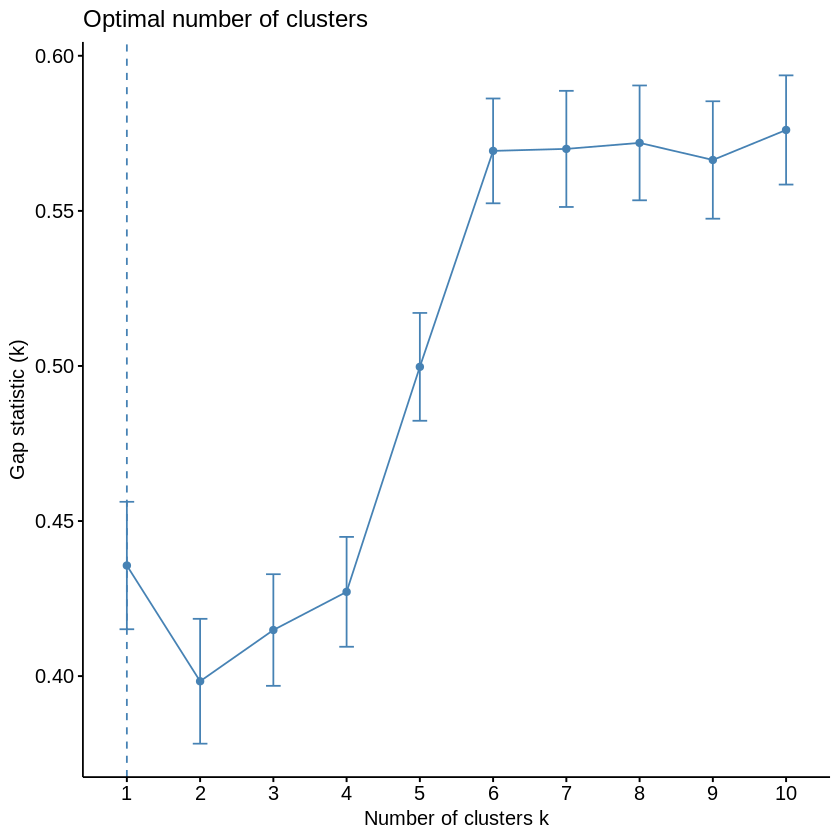

In [35]:
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

In [36]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 35, 22, 38, 44, 22, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 41.68571           88.22857               17.28571
2 44.31818           25.77273               20.27273
3 27.00000           56.65789               49.13158
4 56.34091           53.70455               49.38636
5 25.27273           25.72727               79.36364
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 [38] 5 2 5 4 5 2 3 2 5 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 [75] 4 3 4 3 3 4 4 3 4 4 3 4 4 3 3 4 4 3 4 3 3 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
[112] 3 3 3 3 3 4 4 4 4 3 3 3 6 3 6 1 6 1 6 1 6 3 6 1 6 1 6 1 6 1 6 3 6 1 6 1 6
[149] 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1
[186] 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6

Within cluster sum of squares by cluster:
[1] 16690.857  8189.000  7742.895  7607.477  40

In the output of our kmeans operation, we observe a list with several key information. From this, we conclude the useful information being:

* **cluster –** This is a vector of several integers that denote the cluster which has an allocation of each point.
* **totss –** This represents the total sum of squares.
centers –** Matrix comprising of several cluster centers
* **withinss –** This is a vector representing the intra-cluster sum of squares having one component per cluster.
* **tot.withinss –** This denotes the total intra-cluster sum of squares.
betweenss –** This is the sum of between-cluster squares.
* **size –** The total number of points that each cluster holds.

# Visualizing the Clustering Results using the First Two Principle Components

In [37]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

pcclust$rotation[,1:2]

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


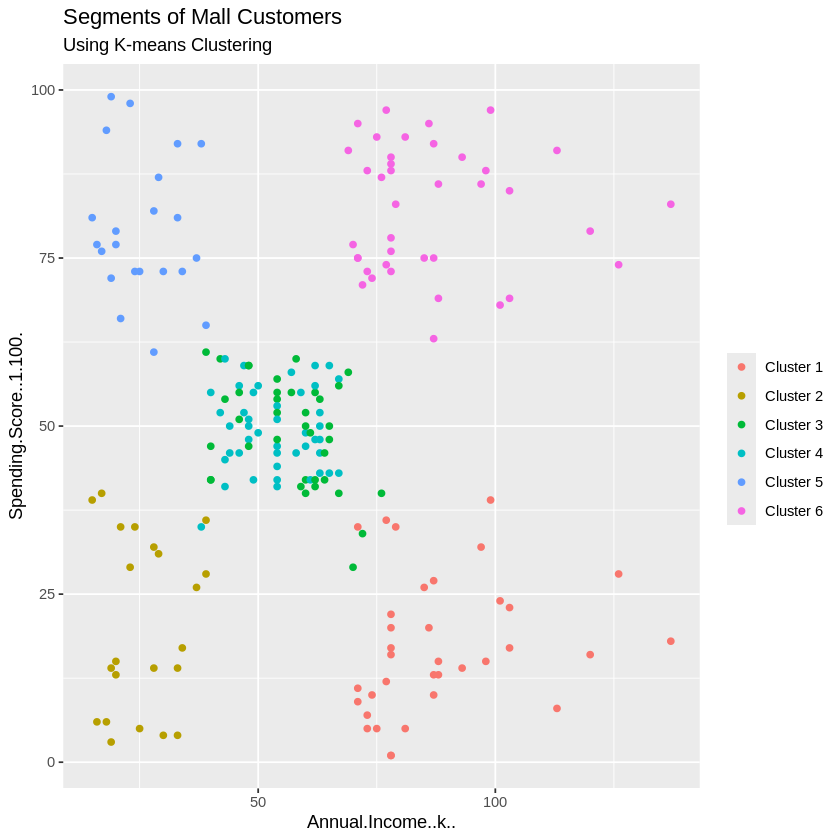

In [38]:
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

From the above visualization, we observe that there is a distribution of 6 clusters as follows –

From the above visualization, we observe that there is a distribution of 6 clusters as follows –

* **Cluster 6 and 4 –** These clusters represent the customer_data with the medium income salary as well as the medium annual spend of salary.

* **Cluster 1 –** This cluster represents the customer_data having a high annual income as well as a high annual spend.

* **3rd Cluster –** This cluster denotes the customer_data with low annual income as well as low yearly spend of income.

* **Cluster 2 –** This cluster denotes a high annual income and low yearly spend.

* **Cluster 5 –** This cluster represents a low annual income but its high yearly expenditure.

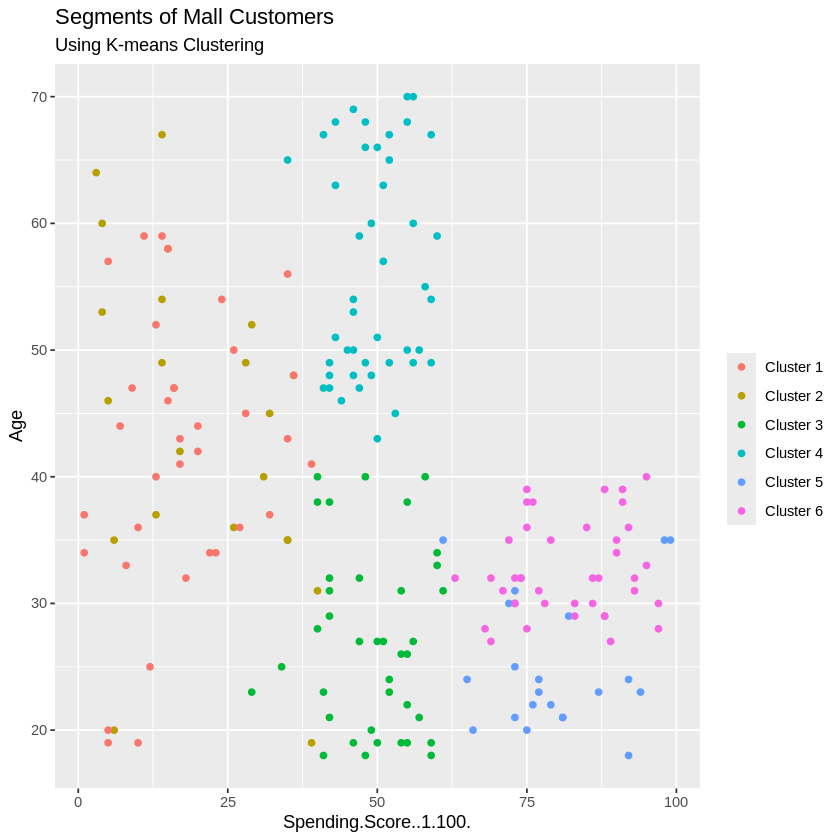

In [39]:
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                      breaks=c("1", "2", "3", "4", "5","6"),
                      labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

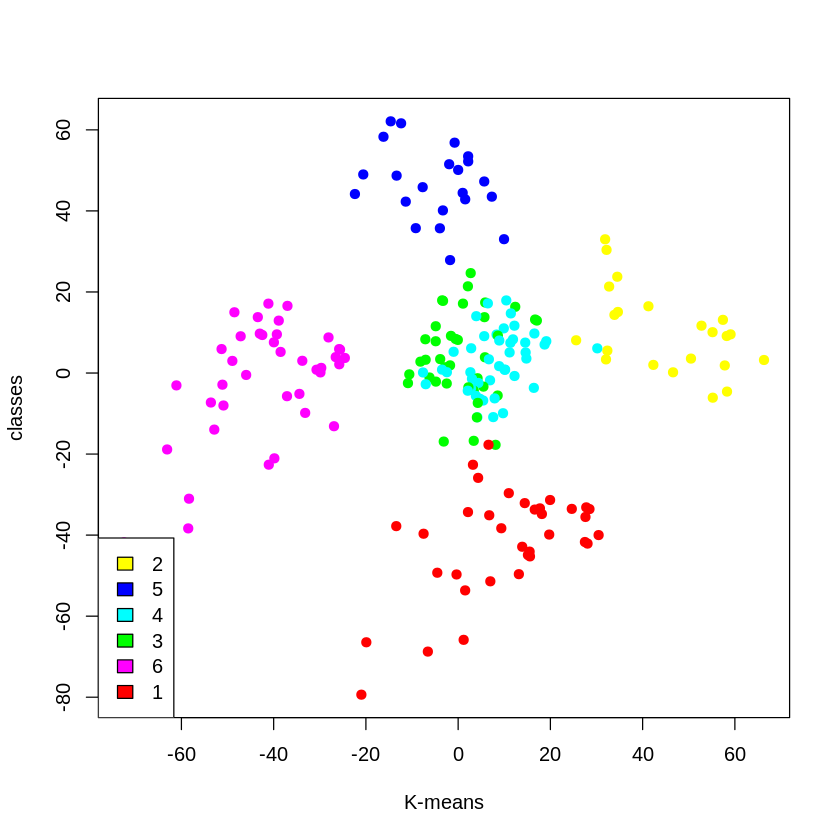

In [40]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))

* **Cluster 4 and 1 –** These two clusters consist of customers with medium PCA1 and medium PCA2 score.

* **Cluster 6 –** This cluster represents customers having a high PCA2 and a low PCA1.

* **5th Cluster –** In this cluster, there are customers with a medium PCA1 and a low PCA2 score.

* **Cluster 3 –** This cluster comprises of customers with a high PCA1 income and a high PCA2.

* **Cluster 2 –** This comprises of customers with a high PCA2 and a medium annual spend of income.

With the help of clustering, we can understand the variables much better, prompting us to take careful decisions. With the identification of customers, companies can release products and services that target customers based on several parameters like income, age, spending patterns, etc. Furthermore, more complex patterns like product reviews are taken into consideration for better segmentation.

#Conclusion
In this project, we went through the customer segmentation model. We developed this using a class of machine learning known as unsupervised learning. Specifically, we made use of a clustering algorithm called K-means clustering. We analyzed and visualized the data and then proceeded to implement our algorithm.